# Machine learning 
- Clustering sur la table df_ml pour regrouper les bières en cluster selon divers critères.
- Identification des bières les plus connues représentatives de chaque cluster 
- Classification de clients à réparti selon les cluster

In [1]:
# Importation des modules nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_ml = pd.read_csv(r'C:\Users\sim13\OneDrive\Documents\Projet_python_2A\data_avis_subj.csv')
print(df_ml.isnull().sum())
df_ml.describe()

id                    0
beer_name             0
beer_style            0
abv                   0
brewery_id            0
brewery_name          0
look            3054607
smell           3054607
taste           3054607
feel            3054607
dtype: int64


,id,abv,brewery_id,look,smell,taste,feel
count,7.293081e+06,7.293081e+06,7.293081e+06,4.238474e+06,4.238474e+06,4.238474e+06,4.238474e+06
mean,7.873959e+04,7.465506e+00,1.004467e+04,3.976432e+00,3.921277e+00,3.951446e+00,3.913611e+00
std,7.838431e+04,2.516584e+00,1.314714e+04,5.375087e-01,5.939705e-01,6.156056e-01,5.832198e-01
min,5.000000e+00,1.000000e-02,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.608700e+04,5.500000e+00,1.730000e+02,3.750000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,5.898100e+04,7.000000e+00,1.146000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,1.090000e+05,9.000000e+00,2.119300e+04,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00
max,3.731120e+05,5.750000e+01,5.405600e+04,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


On crée un dataset sans valeurs manquantes.

In [3]:
df_subj_abv = df_ml.dropna()
df_subj_abv.describe()

,id,abv,brewery_id,look,smell,taste,feel
count,4.238474e+06,4.238474e+06,4.238474e+06,4.238474e+06,4.238474e+06,4.238474e+06,4.238474e+06
mean,9.462797e+04,7.474800e+00,1.149349e+04,3.976432e+00,3.921277e+00,3.951446e+00,3.913611e+00
std,8.902685e+04,2.509207e+00,1.394105e+04,5.375087e-01,5.939705e-01,6.156056e-01,5.832198e-01
min,5.000000e+00,1.000000e-02,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.018400e+04,5.500000e+00,1.990000e+02,3.750000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,6.895800e+04,7.000000e+00,1.432000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,1.493310e+05,9.000000e+00,2.413400e+04,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00
max,3.731040e+05,5.750000e+01,5.355800e+04,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


## Clustering 

- K-means

In [4]:
from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split
k_means = KMeans(n_clusters=4)

## Détermination du nombre de clusters optimal

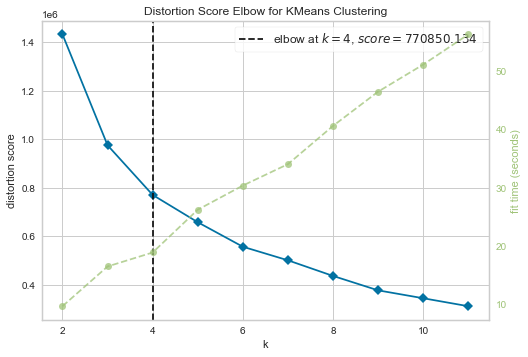

In [23]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(k_means, k=(3, 12))
visualizer.fit(df_subj_abv[['look', 'smell', 'taste', 'feel']])
visualizer.show()

In [5]:
k_means.fit(df_subj_abv[['look', 'smell', 'taste', 'feel']]) #K-means training
abv_pred = k_means.predict(df_subj_abv[['look', 'smell', 'taste', 'feel']])

In [6]:
pred = pd.DataFrame(abv_pred)
pred.describe()

,0
count,4.238474e+06
mean,1.940023e+00
std,1.184013e+00
min,0.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,3.000000e+00


In [ ]:
df_subj_abv['cluster'] = 

## Classification

- Réseaux de neurones
- Random Forest 